In [1]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Step 3: Show the first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check shape of the dataset (rows and columns)
print("Shape of dataset:", df.shape)

# Get column names and data types
print("\nData types and null values:")
print(df.info())

# See how many missing values each column has
print("\nMissing values in each column:")
print(df.isnull().sum())


Shape of dataset: (891, 12)

Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            

In [3]:
# Fill missing Age with median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Verify again
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-3-2326120117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3-2326120117.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Sex' column to numbers: male = 1, female = 0
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# Convert 'Embarked' to one-hot encoding (drop_first=True to avoid duplication)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Show the first few rows again to verify
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale Age and Fare columns
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Show result
df[['Age', 'Fare']].head()


,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


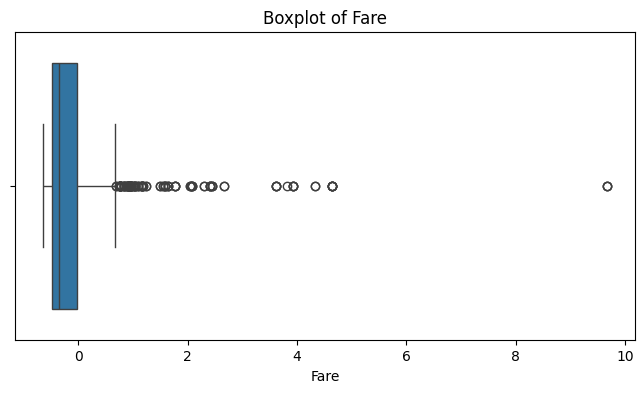

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Fare (to check for outliers)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()


In [7]:
# Calculate Q1 and Q3 for 'Fare'
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows within this range
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Check new shape of the dataset
print("New shape after removing outliers:", df.shape)


New shape after removing outliers: (775, 12)


In [8]:
# Save cleaned dataset
df.to_csv("cleaned_titanic.csv", index=False)

print("✅ Cleaned data saved as 'cleaned_titanic.csv'")


✅ Cleaned data saved as 'cleaned_titanic.csv'
